In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
import sys
sys.path.append("../../utils")
import utils
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score

In [22]:

pollutions_cols = ['pm10', 'pm2.5','nox', 'so2','Tel_Aviv-Yafo_pm10',
       'Jerusalem_pm10', 'Haifa_pm10', 'Ashkelon_pm10', 'Beer-Sheva_pm10',
       'Tel_Aviv-Yafo_pm2.5', 'Jerusalem_pm2.5', 'Haifa_pm2.5',
       'Ashkelon_pm2.5', 'Beer-Sheva_pm2.5', 'Tel_Aviv-Yafo_nox',
       'Jerusalem_nox', 'Haifa_nox', 'Ashkelon_nox', 'Beer-Sheva_nox',
       'Tel_Aviv-Yafo_so2', 'Jerusalem_so2', 'Haifa_so2', 'Ashkelon_so2',
       'Beer-Sheva_so2', 'is_Site_exceeded_pm10', 'is_Site_exceeded_pm2.5',
       'is_Site_exceeded_nox', 'is_Site_exceeded_so2',
       'Tel_Aviv-Yafo_pm10_exceeded', 'Jerusalem_pm10_exceeded',
       'Haifa_pm10_exceeded', 'Ashkelon_pm10_exceeded',
       'Beer-Sheva_pm10_exceeded', 'Tel_Aviv-Yafo_pm2.5_exceeded',
       'Jerusalem_pm2.5_exceeded', 'Haifa_pm2.5_exceeded',
       'Ashkelon_pm2.5_exceeded', 'Beer-Sheva_pm2.5_exceeded',
       'Tel_Aviv-Yafo_so2_exceeded', 'Jerusalem_so2_exceeded',
       'Haifa_so2_exceeded', 'Ashkelon_so2_exceeded',
       'Beer-Sheva_so2_exceeded', 'Tel_Aviv-Yafo_nox_exceeded',
       'Jerusalem_nox_exceeded', 'Haifa_nox_exceeded', 'Ashkelon_nox_exceeded',
       'Beer-Sheva_nox_exceeded']

In [23]:
df = pd.read_excel("../../../site_info_ver_3.2.xlsx")
df.reset_index(drop=True,inplace=True)

In [ ]:
copy_df = df.copy()

copy_df['Time'] = np.arange(len(df.index))

copy_df

In [25]:
def drop(tmp, drops):
    #to_drop = ['Tourists_Count','Israelis_Count','Total']
    cols = tmp.columns
    res = [x for x in cols if x in drops]
    return tmp.drop(res , axis = 1)

In [17]:
#remove stuff
copy_df = drop(copy_df , pollutions_cols)
copy_df = drop(copy_df , ['Date','Total','Tourists_Count'])

In [47]:
def remove_outliers(df,target_name):
  
  #plt.cla()
  bp = plt.boxplot(df[target_name])
  minimums = [round(item.get_ydata()[0], 4) for item in bp['caps']][::2]
  maximums = [round(item.get_ydata()[0], 4) for item in bp['caps']][1::2]
  return df.drop(df [ (df[target_name]>maximums[0])  | (df[target_name]<minimums[0])].index)

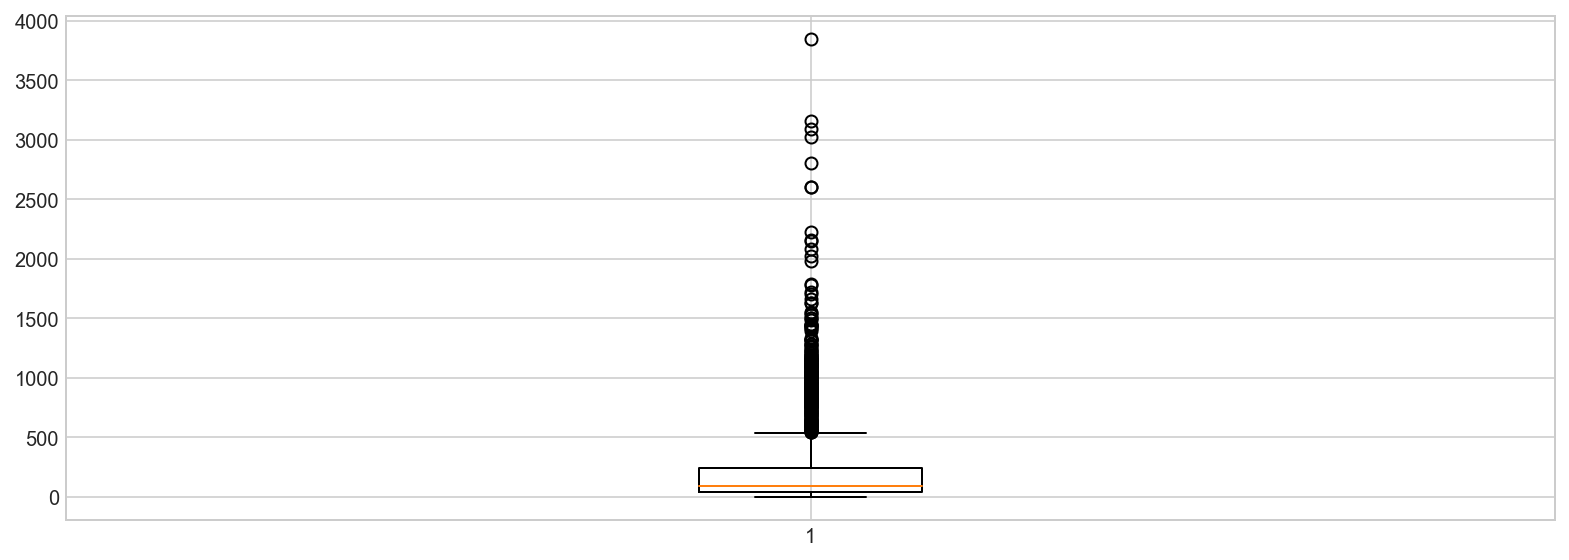

In [48]:
copy_df = copy_df.loc[copy_df.Site_Name == 'Apollonia']
copy_df = remove_outliers(copy_df,'Israelis_Count')

In [49]:
from sklearn.linear_model import LinearRegression

# Training data
X = copy_df.loc[:, ['region_Central', 'region_Judea_Samaria',
       'region_North', 'region_South', 'is_weekend', 'operations',
       'is_jewish_holiday', 'is_jewish_vacation', 'is_muslims_holiday',
       'is_muslims_vacation', 'is_camping', 'special_activity',
       'visit_duration', 'is_jewishHeritage', 'is_muslimsHeritage',
       'is_christiansHeritage', 'is_nationalPark', 'is_natureReserve',
       'is_archaeology', 'is_religion', 'is_animals', 'is_heritage',
       'is_water', 'is_cave', 'is_lookout', 'Temperature', 'is_HeatWave',
       'Green_border', 'Season_autumn', 'Season_spring', 'Season_summer',
       'Season_winter', 'Time']]  # features
y = copy_df.loc[:, 'Israelis_Count']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [50]:
copy_df['Lag_1'] = copy_df['Israelis_Count'].shift(1)

In [55]:
from sklearn.linear_model import LinearRegression

X = copy_df.loc[:, ['Lag_1','region_Central', 'region_Judea_Samaria',
       'region_North', 'region_South', 'is_weekend', 'operations',
       'is_jewish_holiday', 'is_jewish_vacation', 'is_muslims_holiday',
       'is_muslims_vacation', 'is_camping', 'special_activity',
       'visit_duration', 'is_jewishHeritage', 'is_muslimsHeritage',
       'is_christiansHeritage', 'is_nationalPark', 'is_natureReserve',
       'is_archaeology', 'is_religion', 'is_animals', 'is_heritage',
       'is_water', 'is_cave', 'is_lookout', 'Temperature', 'is_HeatWave',
       'Green_border', 'Season_autumn', 'Season_spring', 'Season_summer',
       'Season_winter', 'Time']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = copy_df.loc[:, 'Israelis_Count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target


model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

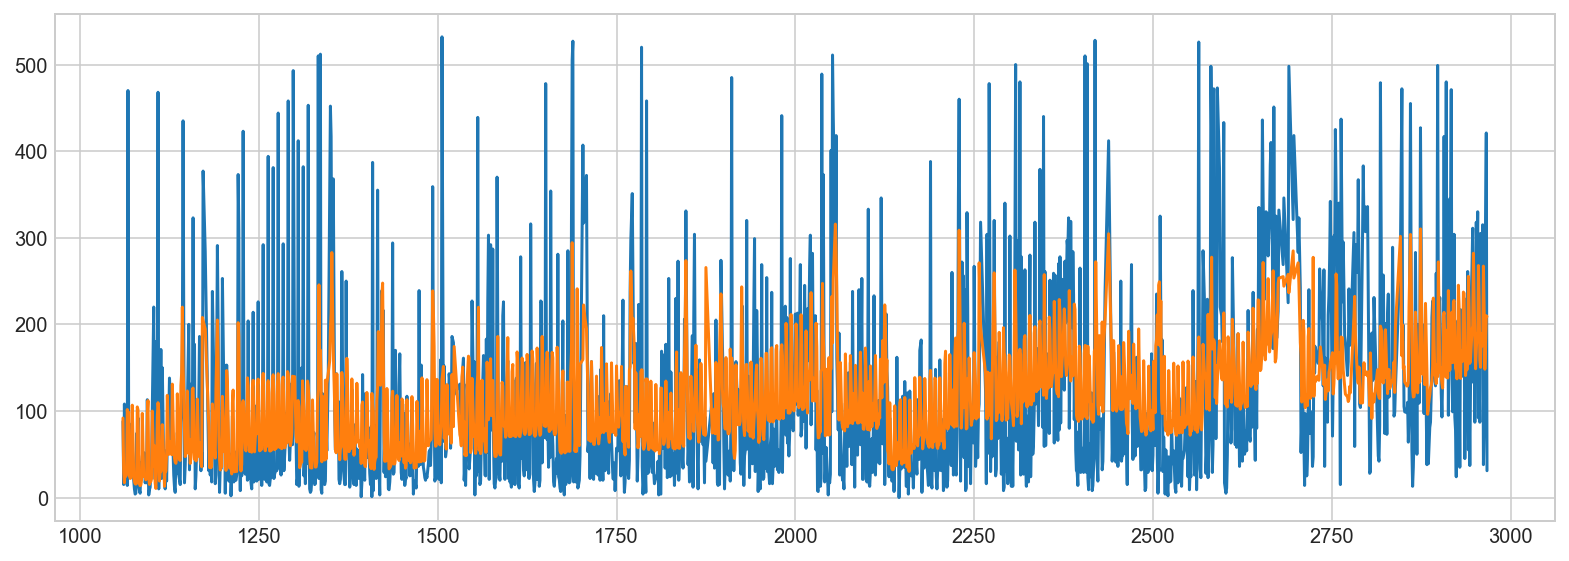

In [56]:
ax = y.plot()
ax = y_pred.plot()